# CAPSTONE TWO: NEGATIVE INCOME TAX EXPERIMENTS

## IMPORTS

In [75]:
import matplotlib
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from scipy import stats
from scipy.stats import jarque_bera
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import normaltest
from scipy.stats import normaltest, boxcox
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sqlalchemy import create_engine
from statsmodels.tsa.stattools import acf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
family_df = pd.read_csv('https://raw.githubusercontent.com/luke-swans0n/NIT/main/gary.csv')


In [77]:
family_df.describe()

,FAMNUM,PERIODIC,POVLEV,TREATLEV,CELLNUM,MODLCITY,ENRLDATE,PAYNUM1,LPAYNUM,ATTDATE,...,SSIR,FSVADM,FSPADM,WAGQTR,UEBEN,FSPD,FSMOS,WAGES,NQ,INCOME
count,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,97578.000000,...,65052.000000,65052.000000,65052.000000,28912.000000,86736.00000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,7805.557277,28.351852,2.717764,1.310459,54.386829,0.440509,71122.436635,9.161040,71.958495,12091.900941,...,9496.087484,5439.452469,5431.710278,1215.726965,1728.14920,5511.077476,51.934145,550.943553,0.470946,9035.420587
std,1302.101367,19.164260,1.288511,1.406536,30.034248,0.496451,123.537799,8.517942,17.053795,27105.293895,...,2171.868451,4962.737186,4970.983795,2634.628430,3754.37194,4893.211264,44.856873,6681.570330,6.185318,18629.282001
min,5000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,71002.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7226.000000,13.000000,1.000000,0.000000,29.000000,0.000000,71053.000000,5.000000,74.000000,0.000000,...,9993.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,2520.000000
50%,7995.000000,26.500000,3.000000,1.000000,58.000000,0.000000,71095.000000,7.000000,77.000000,0.000000,...,9993.000000,9993.000000,9993.000000,0.000000,0.00000,9993.000000,93.000000,0.000000,0.000000,4755.000000
75%,8806.000000,40.000000,4.000000,2.000000,70.000000,1.000000,71158.000000,12.000000,80.000000,0.000000,...,9993.000000,9993.000000,9993.000000,1033.250000,0.00000,9993.000000,93.000000,0.000000,0.000000,8000.000000
max,9692.000000,73.000000,5.000000,4.000000,165.000000,1.000000,72046.000000,99.000000,99.000000,75166.000000,...,9994.000000,9993.000000,9993.000000,9997.000000,9997.00000,9993.000000,93.000000,99993.000000,93.000000,99994.000000


In [78]:
fam_filt_df = family_df[['FAMNUM','PERIODIC','POVLEV','TREATLEV',\
                               'TTIECON', 'SSECON', 'VAECON', 'ASSETECN',\
                               'MISCECON', 'UNEMPECN', 'UMPAYECN',\
                               'WCOMPECN']]

In [79]:
fam_filt_df = fam_filt_df[fam_filt_df['PERIODIC'] == 0]

In [80]:
person_data = {}
with open('ca033001.dat') as f:
    N=0
    for line in f:
        person_data[N] = [line[0:4], line[4:11], line[2611: 2629], line[366:368]]
        N+=1
display(person_data)

{0: ['4000', '4000010', '949494940002020002', '94'],
 1: ['4000', '4000040', '939393939393939393', '93'],
 2: ['4002', '4002010', '949494940200020294', '94'],
 3: ['4003', '4003010', '949494949402020202', '94'],
 4: ['4004', '4004010', '949494949402020294', '94'],
 5: ['4004', '4004080', '939393939393939393', '93'],
 6: ['4004', '4004090', '939393939393939393', '93'],
 7: ['4005', '4005010', '949494949402020294', '94'],
 8: ['4006', '4006010', '949494949402000002', '94'],
 9: ['4007', '4007010', '949494949400000002', '94'],
 10: ['4008', '4008010', '949494949402029494', '94'],
 11: ['4009', '4009010', '949494949400000194', '94'],
 12: ['4010', '4010010', '949494949494020294', '94'],
 13: ['4011', '4011010', '949494949402020294', '94'],
 14: ['4012', '4012010', '949494949494000002', '94'],
 15: ['4013', '4013010', '949494949494020294', '94'],
 16: ['4014', '4014010', '949494949494020002', '94'],
 17: ['5000', '5000010', '940202020202020202', '94'],
 18: ['5002', '5002010', '010100019494

In [81]:
person_columns = ['FAMNUM', 'PRSNNUM', 'EMPINT', 'HIGRADE']
person_df = pd.DataFrame.from_dict(person_data, orient='index', columns=person_columns)

In [82]:
person_df['FAMNUM'] = person_df.FAMNUM.astype(int)                    
gary_df = person_df.merge(fam_filt_df, on='FAMNUM', how='outer')
display(gary_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5343 entries, 0 to 5342
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FAMNUM    5343 non-null   int32  
 1   PRSNNUM   5343 non-null   object 
 2   EMPINT    5343 non-null   object 
 3   HIGRADE   5343 non-null   object 
 4   PERIODIC  5326 non-null   float64
 5   POVLEV    5326 non-null   float64
 6   TREATLEV  5326 non-null   float64
 7   TTIECON   5326 non-null   float64
 8   SSECON    5326 non-null   float64
 9   VAECON    5326 non-null   float64
 10  ASSETECN  5326 non-null   float64
 11  MISCECON  5326 non-null   float64
 12  UNEMPECN  5326 non-null   float64
 13  UMPAYECN  5326 non-null   float64
 14  WCOMPECN  5326 non-null   float64
dtypes: float64(11), int32(1), object(3)
memory usage: 647.0+ KB


None

## DATA CLEANING

### HANDLING NULLS

In [83]:
gary_df['HIGRADE'].replace('94|93',np.NaN,inplace=True,regex=True)

In [84]:
gary_df.dropna(inplace = True)

In [85]:
gary_df.replace(9994, np.NaN, inplace = True)
gary_df.replace(994, np.NaN, inplace = True)

In [87]:
columns_to_drop = ['FAMNUM', 'PRSNNUM', 'PERIODIC']
gary_df.drop(columns_to_drop, axis=1, inplace=True)

In [88]:
gary_df.isnull().sum()

EMPINT         0
HIGRADE        0
POVLEV         0
TREATLEV       0
TTIECON     4045
SSECON         6
VAECON         0
ASSETECN    4076
MISCECON       0
UNEMPECN       0
UMPAYECN       6
WCOMPECN       0
dtype: int64

In [89]:
gary_df.drop(['TTIECON', 'ASSETECN'], axis=1, inplace=True)

In [90]:
gary_df.replace(np.NaN, 0, inplace=True)

In [ ]:
gary_df = gary_df[gary_df['EMPINT'].str.contains('01|02|00', regex=True)]
gary_df['EMPINT'] = gary_df['EMPINT'].str.contains('01')
gary_df['EMPINT']

## Encoding

In [ ]:
gary_df = pd.concat([gary_df, pd.get_dummies(gary_df['TREATLEV'], drop_first=True)], axis=1)
gary_df.drop(['TREATLEV'], axis=1, inplace=True)
col_dict = {1.0:'LOTR_HITAX', 2.0:'LOTR_LOTAX', 3.0: 'HITR_HITAX', 4.0:'HITR_LOTAX'}
gary_df.rename(columns = col_dict, inplace=True)
#gary_df['TREATLEV'].replace("1|2|3|4", 1, inplace=True,regex=True)

In [ ]:
gary_df = pd.concat([gary_df, pd.get_dummies(gary_df['POVLEV'], drop_first=True)], axis=1)
gary_df.drop(['POVLEV'], axis=1, inplace=True)
col_dict = {2.0:'POV_LEV_2', 3.0: 'POV_LEV_3', 4.0:'POV_LEV_4', 5.0:'POV_LEV_5'}
gary_df.rename(columns = col_dict, inplace=True)

In [ ]:
gary_df.columns

(array([4068.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          16.]),
 array([    0. ,  9999.3, 19998.6, 29997.9, 39997.2, 49996.5, 59995.8,
        69995.1, 79994.4, 89993.7, 99993. ]),
 <a list of 10 Patch objects>)

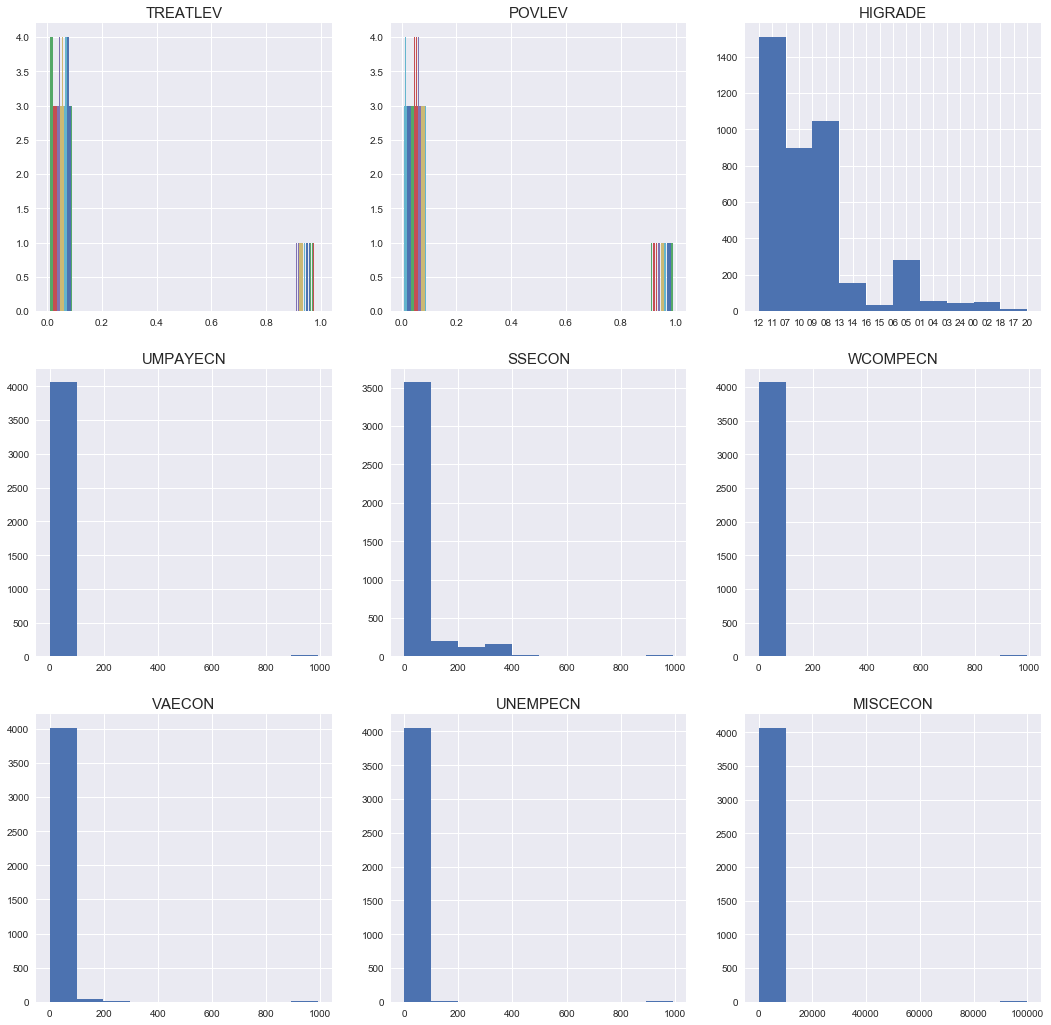

In [119]:
matplotlib.style.use('seaborn')
plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
plt.gca().set_title('TREATLEV',  fontsize = 15)
#plt.hist(gary_df[['LOTR_HITAX','LOTR_LOTAX','HITR_HITAX','HITR_LOTAX']])
plt.subplot(3,3,2)
plt.gca().set_title('POVLEV', fontsize = 15)
#plt.hist(gary_df[['POV_LEV_2', 'POV_LEV_3', 'POV_LEV_4', 'POV_LEV_5']])
plt.subplot(3,3,3)
plt.gca().set_title('HIGRADE', fontsize = 15)
plt.hist(gary_df['HIGRADE'])
plt.subplot(3,3,4)
plt.gca().set_title('UMPAYECN' , fontsize = 15)
plt.hist(gary_df['UMPAYECN'])
plt.subplot(3,3,5)
plt.gca().set_title('SSECON' , fontsize = 15)
plt.hist(gary_df['SSECON'])
plt.subplot(3,3,6)
plt.gca().set_title('WCOMPECN' , fontsize = 15)
plt.hist(gary_df['WCOMPECN'])
plt.subplot(3,3,7)
plt.gca().set_title('VAECON' , fontsize = 15)
plt.hist(gary_df['VAECON'])
plt.subplot(3,3,8)
plt.gca().set_title('UNEMPECN' , fontsize = 15)
plt.hist(gary_df['UNEMPECN'])
plt.subplot(3,3,9)
plt.gca().set_title('MISCECON' , fontsize = 15)
plt.hist(gary_df['MISCECON'])

## Logistic Regression

In [105]:
X= gary_df.drop('EMPINT', axis=1)
Y= gary_df['EMPINT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Dummy-test

In [106]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5532435740514076

In [107]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Unemp', 'Emp'])
print(dummy_report)

              precision    recall  f1-score   support

       Unemp       0.55      1.00      0.71       452
         Emp       0.00      0.00      0.00       365

    accuracy                           0.55       817
   macro avg       0.28      0.50      0.36       817
weighted avg       0.31      0.55      0.39       817



In [109]:
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr,\
                   param_grid = { \
                                'C' : np.arange(0.05, 1.0, .05),\
                                'penalty' : ['l2'],\
                                'max_iter' : np.arange(500, 5000, 500)},
                   verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=500, penalty=l2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=500, penalty=l2 ................................


C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.05, max_iter=1500, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1500, penalty=l2, total=   0.1s
[CV] C=0.05, max_iter=1500, penalty=l2 ...............................
[CV] .

[CV] ................. C=0.1, max_iter=2000, penalty=l2, total=   0.2s
[CV] C=0.1, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.1, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2500, penalty=l2, total=   0.2s
[CV] C=0.1, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.1, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.1, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.1, max_iter=3000, penalty=l2 ................................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=0.15000000000000002, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.15000000000000002, max_iter=1000, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.15000000000000002, max_iter=1000, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.15000000000000002, max_iter=1000, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.15000000000000002, max_iter=1000, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=0.15000000000000002, max_iter=1500, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1500, penalty=l2, total=   0.1s
[CV] C=0.15000000000000002, max_iter=1500, penalty=l2 ................
[CV] . C=0.15000000000000002, max_iter=1500, penalty=l2, total=   0.1s
[CV] C=0.15000000000000002, max_iter=1500, penalty=l2 ................
[CV] .

[CV] ................. C=0.2, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.2, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.2, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.2, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.2, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.2, max_iter=3000, penalty=l2 ................................
[CV] .

[CV] ................ C=0.25, max_iter=3500, penalty=l2, total=   0.1s
[CV] C=0.25, max_iter=4000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.25, max_iter=4000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.25, max_iter=4000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=4000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=4000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.25, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=4500, penalty=l2, total=   0.1s
[CV] C=0.25, max_iter=4500, penalty=l2 ...............................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .. C=0.35000000000000003, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.35000000000000003, max_iter=500, penalty=l2 .................
[CV] .. C=0.35000000000000003, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=500, penalty=l2 .................
[CV] .. C=0.35000000000000003, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.35000000000000003, max_iter=500, penalty=l2 .................
[CV] .. C=0.35000000000000003, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.4, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.4, max_iter=500, penalty=l2 .................................
[CV] .................. C=0.4, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.4, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.4, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=0.4, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.4, max_iter=1500, penalty=l2 ................................
[CV] .

[CV] ................ C=0.45, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.45, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.45, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.45, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.45, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.45, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.45, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.45, max_iter=3000, penalty=l2, total=   0.1s
[CV] C=0.45, max_iter=3000, penalty=l2 ...............................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.5, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.5, max_iter=500, penalty=l2 .................................
[CV] .................. C=0.5, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.5, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.5, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.5, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=0.5, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=1500, penalty=l2 ................................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.55, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.55, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.55, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.55, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.55, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.55, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.55, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.55, max_iter=1500, penalty=l2 ...............................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ... C=0.6000000000000001, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.6000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.6000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.6000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.6000000000000001, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.6000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.6000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.6000000000000001, max_iter=1000, penalty=l2 .................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ... C=0.6500000000000001, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.6500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.6500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.6500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.6500000000000001, max_iter=1000, penalty=l2 .................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ... C=0.7000000000000001, max_iter=500, penalty=l2, total=   0.2s
[CV] C=0.7000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.7000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.7000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7000000000000001, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=0.7000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, max_iter=1000, penalty=l2 .................
[CV] .

[CV] .. C=0.7500000000000001, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2000, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=2500, penalty=l2, total=   0.1s
[CV] C=0.7500000000000001, max_iter=2500, penalty=l2 .................
[CV] .

[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.1s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] .

[CV] .. C=0.8500000000000001, max_iter=4500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9000000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.9000000000000001, max_iter=1000, penalty=l2 .................
[CV] .

C:\Users\thebi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ... C=0.9500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.9500000000000001, max_iter=500, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=1000, penalty=l2, total=   0.2s
[CV] C=0.9500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=1000, penalty=l2, total=   0.1s
[CV] C=0.9500000000000001, max_iter=1000, penalty=l2 .................
[CV] .

[Parallel(n_jobs=1)]: Done 855 out of 855 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'max_iter': array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=

In [110]:
print(classification_report(y_test, grid.predict(X_test), target_names=['Unemp', 'Emp']))

              precision    recall  f1-score   support

       Unemp       0.59      0.81      0.68       452
         Emp       0.57      0.32      0.41       365

    accuracy                           0.59       817
   macro avg       0.58      0.56      0.55       817
weighted avg       0.58      0.59      0.56       817



## RANDOM FOREST

In [113]:
rfc = ensemble.RandomForestClassifier()
grid = GridSearchCV(estimator = rfc,
                         param_grid={\
                                    'max_depth' : [1, 2, 3],\
                                    'criterion':['gini', 'entropy'],\
                                    'min_samples_split' : np.arange(0.05,1.0, 0.05),\
                                             },
                   verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..........

[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples

[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.25 .............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.25, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.25 .............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.25, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_split=0.25 .............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.25, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.25 ..........

[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.8 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.8, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.8 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.8, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.8 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.8, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.8 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.8, total=   0.1s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.35000000000000003 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.1s
[CV] criterion=gini, max_depth=3, mi

[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9500000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9500000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9500000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9500000000000001 
[CV]  criterion=gini, max_depth=3, min_samples

[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.55 ..........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.55, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.55 ..........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.55, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.55 ..........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.55, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_sampl

[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.05 ..........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_sample

[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.7000000000000001 
[CV]  crit

[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.25 ..........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.25, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.25 ..........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.25, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.25 ..........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.25, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_sampl

[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.8 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.8, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.8 ...........
[CV]  criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done 570 out of 570 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [116]:
print(classification_report(y_test, grid.predict(X_test), target_names=['Unemp', 'Emp']))

              precision    recall  f1-score   support

       Unemp       0.57      0.94      0.71       452
         Emp       0.63      0.13      0.22       365

    accuracy                           0.58       817
   macro avg       0.60      0.53      0.46       817
weighted avg       0.60      0.58      0.49       817



In [118]:
clf = ensemble.GradientBoostingClassifier()
rand = RandomizedSearchCV(estimator=clf,\
                   param_distributions = { \
                                'n_estimators' : np.arange(500, 1000, 250),\
                                'max_depth' : np.arange(1,3),\
                                'learning_rate' : np.arange(0.1, .90, 0.1)})
rand.fit(X_train, y_train)
print(classification_report(y_test, rand.predict(X_test), target_names=['Unemp', 'Emp']))

              precision    recall  f1-score   support

       Unemp       0.63      0.76      0.69       452
         Emp       0.60      0.45      0.51       365

    accuracy                           0.62       817
   macro avg       0.62      0.60      0.60       817
weighted avg       0.62      0.62      0.61       817



In [ ]:
#gary_df['NOTINFR'] = gary_df['EMPINT'].str.contains('02')
#gary_df['NOTINFR'] = gary_df['NOTINFR'].astype(int)
#gary_df['EMPGAIN'] = gary_df['EMPINT'].str.contains('(00)(01)', regex=True)

In [ ]:
#gary_df['EMPLOSS'] = gary_df['EMPINT'].str.contains('(01)(00)', regex=True)

In [ ]:
#gary_df['EMPGAIN'] = gary_df.EMPGAIN.astype(int)

In [ ]:
#gary_df['EMPLOSS'] = gary_df.EMPLOSS.astype(int)

In [ ]:
#columns_for_later = ['EMPLOSS', 'EMPGAIN']
#gary_df.drop(columns_for_later, axis=1, inplace=True)

In [ ]:
#gary_df['EMP'] = gary_df['EMPINT'].str.contains('01')
#gary_df['EMP'] = gary_df.EMP.astype(int)